# Agenda 

- Some notes on Python coding style and use of modules
- Correlation and causation
- Hypothesis testing
- Good Graphics?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Using Python Modules

Last week I had the following code in my notebook for the lecture to read in an XML file to a data frame.  Having this code inline like this is good for my lectures since I want to show you the code, but in general it looks messy. 

It's also a potentially re-usable bit of code that I might want to use in other notebooks or later on in this same notebook to read an XML file.  

A better option is to use a separate Python file that we import into this notebook, and to write the code as a function in that file that we can use here.  

Let's refactor this code to do this...

In [2]:
# here is the original code block
import xml.etree.ElementTree as ET

tree = ET.parse('files/sample.xml')
root = tree.getroot()
data = []
for row in root:
    # create a dictionary for each row
    datarow = {}
    for child in row:
        # dictionary key is the tag name, value is the text in the tag
        datarow[child.tag] = child.text
    data.append(datarow)

# now make a dataframe from this list of dictionaries
df = pd.DataFrame(data)
# sort on date
df = df.sort_values('Date')
# create a series from the dates as datetimes
dates = pd.to_datetime(df.Date)
# make this the index of the dataframe
df.index = dates
# remove the Date column (axis=1 means we're dropping a column, not rows)
df.drop('Date', axis=1, inplace=True)

In [3]:
# refactored by copying to a file utils.py and defining a function 
# readxml that we import here

from utils import readxml

df = readxml('files/sample.xml')
# let's take a look
df.head()

,Amount,City,Name
Date,,,
2016-08-24 08:35:12,97.98,Neumünster,Tanya
2016-08-27 03:56:02,99.04,Rovereto,Molly
2016-09-06 08:58:15,99.27,Rovereto,Aiko
2016-09-10 21:10:12,96.53,Westkerke,Dante
2016-09-12 22:32:09,107.23,Pointe-aux-Trembles,Sydney


Things to note:
- when you import the module into your notebook that loads the code into the Python interpreter that is running your code
- if you change the code in your module, then re-run your notebook, it won't re-import the module, you need to re-start the interpreter via the Kernel menu (*Kernel > Restart and Run All*)
- you can either import specific functions from your module or import the whole module
    - *import utils* # then call utils.do_something()
    - *from utils import do_something* # then call do_something()

## Correlation

Last week we looked at the relationship between ATAR and grade for some student data.

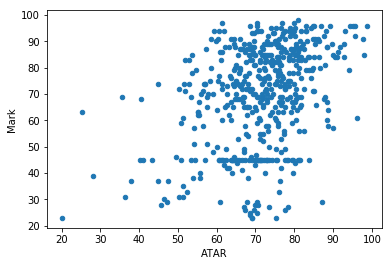

In [4]:
grades = pd.read_csv("files/grades.csv")
# remove zeros
grades = grades.drop(grades.index[(grades.Mark == 0) | (grades.ATAR == 0)])
grades.plot('ATAR', 'Mark', kind='scatter')


(0, 103.20756065686282)

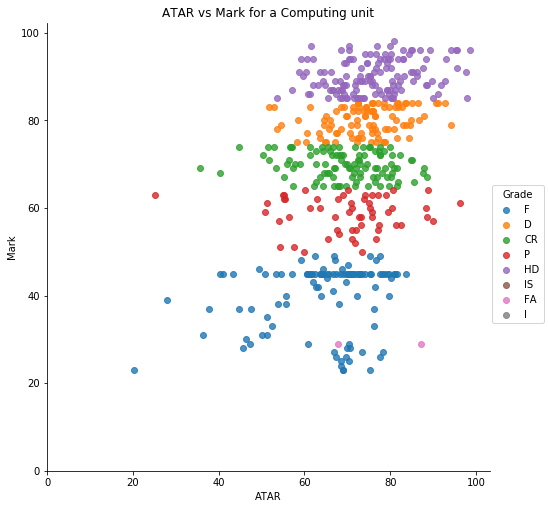

In [5]:
# or plot using seaborn
sns.lmplot(x='ATAR', y='Mark', data=grades, fit_reg=False, hue="Grade", size=7)
plt.title("ATAR vs Mark for a Computing unit")
plt.ylim(0, None)
plt.xlim(0, None)

We can see from the plot that there isn't much of a relationship between these two variables. As ATAR increases, the range of values for Mark doesn't change very much.  

To quantify this we can look at the **covariance** or **correlation** between the two variables.  


## Covariance

- how the two variables vary together, 
- larger values mean that the size of the mutual deviation from the mean is large
- if two variables are totally unrelated, the covariance would be zero.
- but the fact that covariance can be any value makes it hard to interpret:

In [6]:
grades.cov()

,ATAR,Mark
ATAR,122.931200,78.932811
Mark,78.932811,359.535302


## Correlation

**Correlation** is a normalised version of covariance, standardised to between -1 and 1.  

Much easier to interpret - a value of 1 (or -1) means a perfect relationship between the two variables.  The close to 1 the better the relationship.  

The correlation of Mark and ATAR is 0.37 which is very low, confirming that there is no real relationship between these variables.

In [7]:
grades.corr()

,ATAR,Mark
ATAR,1.000000,0.373856
Mark,0.373856,1.000000


Let's look at another dataset that shows a better correlation.  This is the [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) from the UCI archive.

In [8]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


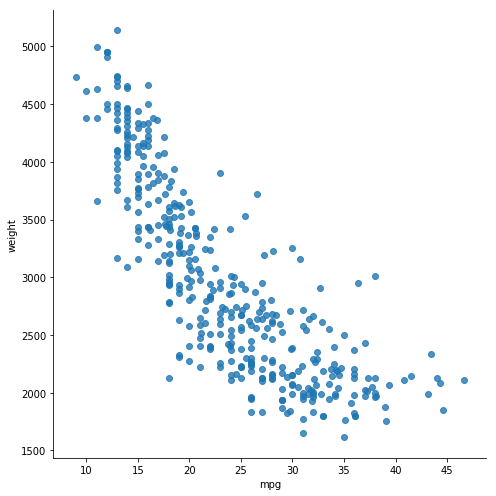

In [9]:
sns.lmplot(x='mpg', y='weight', data=autompg, fit_reg=False, size=7)

We can see from the plot an more obvious negative relationship between *mpg* and *weight* - heavier cars use more fuel. 

The correlation is -0.83 which is close to -1 and shows a high negative correlation.  

In [10]:
autompg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Correlation and Causation

When we look for a correlation between two variables we are often looking to see if we can find evidence for some kind of causal relationship.   Does having a higher ATAR mean that you will are smart and will pass this course? Does adding weight to a car make it use more petrol? 

In this case, we can say definitely not for the first question and *maybe* for the second.

We need to be careful in drawing inferences even when a correlation is observed.  In the example of the cars, the weight may be a factor in using more fuel but we could also look at the size of the engine - bigger engines will weigh more - and other factors that might affect fuel use.  


Here's a discussion [from the Computation and Inferential Thinking text](https://www.inferentialthinking.com/chapters/02/causality-and-experiments.html):

>Observation is a key to good science. An **observational study** is one in which scientists make conclusions based on data that they have observed but had no hand in generating. In data science, many such studies involve observations on a group of individuals, a factor of interest called a **treatment**, and an **outcome** measured on each individual.



>It is easiest to think of the **individuals** as people. In a study of whether chocolate is good for the health, the individuals would indeed be people, the treatment would be **eating chocolate**, and the outcome might be a measure of **blood pressure**. But individuals in observational studies need not be people. In a study of whether the death penalty has a deterrent effect, the individuals could be the **50 states of the union**. A state law **allowing the death penalty** would be the treatment, and an outcome could be the state’s **murder rate**.
    


>The fundamental question is whether the treatment has an effect on the outcome. Any relation between the treatment and the outcome is called an **association**. If the treatment causes the outcome to occur, then the association is **causal**. Causality is at the heart of all three questions posed at the start of this section. For example, one of the questions was whether chocolate directly causes improvements in health, not just whether there there is a relation between chocolate and health.


### Confounding Factors

To establish causality we first need to observe a correlation, but then we need to be sure that this is not due to some **confounding** factor: a variable that we have not measured or understood, that accounts for the association we observe.  

Again from [C&I Thinking](https://www.inferentialthinking.com/chapters/02/3/establishing-causality.html):

>**Example: Coffee and lung cancer.** Studies in the 1960’s showed that coffee drinkers had higher rates of lung cancer than those who did not drink coffee. Because of this, some people identified coffee as a cause of lung cancer. But coffee does not cause lung cancer. The analysis contained a confounding factor – smoking. In those days, coffee drinkers were also likely to have been smokers, and smoking does cause lung cancer. Coffee drinking was associated with lung cancer, but it did not cause the disease.

## Randomisation

One defence against confounding factors in experiments is to select the treatment and control groups at random from a larger population. If we suspect that some other factors may be important, we can ensure that the two groups are balanced for that factor.  For example, we might ensure that there are equal numbers of males and females in each group.  Selecting people at random is a way of doing this.

 

A **blind** randomised trial is one where the members of each group don't know which group they are in. Are they getting a treatment or not? In a medical setting this would involve the use of a **placebo** - it is well known that people will often feel better just because they know they are being treated.



A **double blind** trial is one where the researchers don't know which group people are in either. This prevents any effects where the researcher might unconciously influence the outcome of the experiment.  Obviously in some cases, double blind is not feasible.

## Theory and Explanation

While we can establish an association between a treatment and an outcome, and eliminate as many confounding factors as we understand, we become more convinced of the argument for a causal link if there is also a good theoretical explanation for what is observed.  This might be based on simple Physics (more weight means more fuel) or on a complex biological explanation of a disease phenomenon (smoking causes cancer).  

The theory is strenthened by the observations, but a good theory will also make **predictions** that can be tested in future experiments.  Thinking back to our earlier discussion of the **science** in **data science**: a good theory should be falsifiable, there should be an experiment you can do that if it failed, would disprove the theory.  All of this goes together to give us sound explanations for what we see around us and advance our knowledge.


## Summary

- Correlation is a measure of the association between two variables
- In an experiment, we collect data generally trying to establish a causal relationship 
- Confounding factors can mean that an association is observed when there is no causal link
- To gather evidence for causality, we need more than an observed relationship, we need to exclude confounding factors and to provide some kind of theoretical explanation

## Hypothesis Testing

(Textbook Section 4.4)

In an experiment we might observe a difference in the outcome for the control and treatment groups - high ATAR students might get higher grades on average than low ATAR students for example.  This difference could be due to a real difference between these groups, or it could be just happening by chance.  We may have accidentally chosen some really good high ATAR students and some really poor low ATAR students.  How can we be sure of our conclusion?




Hypothesis testing is a method of measuring the liklihood that an observed difference occured by chance.

It can be used in cases where we have two samples from a population that we believe are different - because we gave them different medicines or because they differ by some factor we think is causally related to the outcome (older, smarter, richer). 

Define a **null hypothesis** that the populations are really the same.  Aim to **reject the null hypothesis** by showing that this could only happen with a very low probability.

One measure used is the *p-value* which is the probability that the observed difference could occur at random. I recommend you read the textbook section (4.4) which provides a nice explanation of this. The basic idea they describe is:

- from the overall population (the two groups pooled together), draw samples of size N
- compute the difference between the mean of this sample and the overall mean
- count how many times the difference is larger than the one we observe overall between the two groups



If we can find lots of cases where the sample we draw has a larger difference from the mean, then the difference we observe is likely to be just a random effect.   If it hardly ever happens, then the difference we observe might be a significant one. 

It is common to set a threshold of 5% for significance.  If the p value is less than 0.05 we say that the observed difference is unlikely to occur at random and so is likely to be due to a real effect.  We **reject the null hypothesis** that these distributions are the same.

## Visualisation

An exercise in critical analysis of data visualisation

<a href="files/bad-graphs.png"><img src="files/bad-graphs.png" width=60%></a>

For each of these graphs there is something wrong or some major criticism that has been made of the graph. Can you identify the issue(s) in each case? How would the graphs be improved? [source](http://www.statisticshowto.com/misleading-graphs/).



## Good Graphs?

<p><a href="https://commons.wikimedia.org/wiki/File:Minard.png#/media/File:Minard.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Minard.png/1200px-Minard.png" alt="Minard.png"></a><br>By <a href="https://en.wikipedia.org/wiki/Charles_Minard" class="extiw" title="w:Charles Minard">Charles Minard</a> (1781-1870), Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=297925">Link</a></p>




The above is a classic example of great data visualisation - originally from 1869, showing the devastation over the march of Napoleon towards defeat in Moscow and their return home.  This chart uses graphical design to tell a story, it combines the display of multi-dimensional data with a striking graphical layout.  

We can perhaps aspire to creating visualisations as good as this but doing so would require a combination of great data handling skills and an eye for good visual design.  I expect you all to master the first of these but it might be too much to expect the latter from everyone.  Even so, we can all learn to appreciate what makes a good visualisation work and what we should avoid in presenting data. 

The [chapter I've recommended for reading](https://link.springer.com/content/pdf/10.1007%2F978-3-540-33037-0_3.pdf) on this gives a bit of an overview of what makes for good data visualisation. 



## Choice of Graphical Form

### Scales
- numerical scales, common to include zero, range of values can influence interpretation
- in a histogram, the size of bins (granularity of the scale) can obscure or reveal insights
- scales in related graphs should be comparable
- for categorical variables (eg. names of cities) the ordering can be influential



## Overlaying Information
- eg. overlay of smoothed mean, indications of error bars
- overlay should aid the interpretation of the data
- take care not to obscure data with too many additions

## Captions, Legends and Annotations
- graphs should always have labelled axes, including units where appropriate
- legends attach labels to different parts of the graph (colours, line styles), should be on the plot (Tufte)
- annotations should be used sparingly (see overlays) eg. Figure 2.8



## Apect Ratio
- squashing a graph one way or the other can hugely distort the presentation (Figure 2.9)

## Colour
- use of colour should take account of colour blindness [palletes for colour blindness](http://mkweb.bcgsc.ca/colorblind/) [some examples and advice](http://www.dundas.com/support/blog/visualizing-for-the-color-blind)
- certain colours have a cultural meaning that might effect how your graphics are interpreted



## Multidimensional Visualisation
- techniques for displaying more than a simple binary relationship
- many variables influencing different aspects of the graphic
- is a 3D plot ever a good idea?
- scatterplot matrix shows how pairs of variables change together (Figure 2.10)
- trellis display arranges related graphs in a grid (Figure 2.14)


## Maps
- overlaying data on maps allows you to associated data points with geographical areas
- can be misleading since size of geographic region does not relate to population
    - see [these cartograms](http://www-personal.umich.edu/~mejn/election/2016/) showing a method for scaling geographical areas based on population.


[Data Vizualisation Chart Types](https://eazybi.com/blog/data_visualization_and_chart_types/) has a list of chart types with some ideas of when to use them. It includes a reference to [choosing a good chart](http://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf) by Dr. Andrew Abela, a useful cheat sheet.
